In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [62]:
from google.colab import drive
drive.mount('/content/drive')
file_path = '/content/drive/My Drive/Stock_BSDR1.csv'


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [64]:
df = pd.read_csv('/content/drive/MyDrive/Stock_BSDR1.csv')


In [65]:
df

,Unnamed: 0,<TICKER>,<DTYYYYMMDD>,<HIGH>,<LOW>,<CLOSE>,<VALUE>,<VOL>,<OPENINT>,<PER>,<OPEN>,<LAST>
0,0,Saderat.Bank,20090609,1002.0,1001.0,1001.0,983488599500,982499500,545,D,1001.0,1001.0
1,1,Saderat.Bank,20090610,1031.0,1020.0,1021.0,54893697467,53760812,2406,D,1001.0,1025.0
2,2,Saderat.Bank,20090613,1025.0,1006.0,1023.0,123460074455,120700223,5411,D,1021.0,1024.0
3,3,Saderat.Bank,20090614,1026.0,1019.0,1024.0,40854431828,39890423,1995,D,1023.0,1025.0
4,4,Saderat.Bank,20090615,1026.0,1025.0,1025.0,35538526668,34669556,1561,D,1024.0,1025.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2681,2681,Saderat.Bank,20230118,2015.0,1928.0,1971.0,618048391496,313543009,6888,D,1948.0,1951.0
2682,2682,Saderat.Bank,20230121,2044.0,1880.0,1939.0,602405898056,310713117,5170,D,1971.0,1940.0
2683,2683,Saderat.Bank,20230122,1976.0,1870.0,1921.0,541480099554,281841691,4869,D,1939.0,1961.0
2684,2684,Saderat.Bank,20230123,1979.0,1870.0,1926.0,541744542944,281260852,3834,D,1921.0,1894.0


In [66]:
df = df.drop(['Unnamed: 0','<TICKER>'], axis=1)

In [67]:
df = df.rename(columns={'<DTYYYYMMDD>': 'date', '<HIGH>': 'high','<LOW>': 'low', '<CLOSE>': 'close', '<VALUE>': 'value',
                        '<VOL>': 'vol', '<OPENINT>': 'openint','<PER>': 'per', '<OPEN>': 'open', '<LAST>': 'last'})

In [68]:
df

,date,high,low,close,value,vol,openint,per,open,last
0,20090609,1002.0,1001.0,1001.0,983488599500,982499500,545,D,1001.0,1001.0
1,20090610,1031.0,1020.0,1021.0,54893697467,53760812,2406,D,1001.0,1025.0
2,20090613,1025.0,1006.0,1023.0,123460074455,120700223,5411,D,1021.0,1024.0
3,20090614,1026.0,1019.0,1024.0,40854431828,39890423,1995,D,1023.0,1025.0
4,20090615,1026.0,1025.0,1025.0,35538526668,34669556,1561,D,1024.0,1025.0
...,...,...,...,...,...,...,...,...,...,...
2681,20230118,2015.0,1928.0,1971.0,618048391496,313543009,6888,D,1948.0,1951.0
2682,20230121,2044.0,1880.0,1939.0,602405898056,310713117,5170,D,1971.0,1940.0
2683,20230122,1976.0,1870.0,1921.0,541480099554,281841691,4869,D,1939.0,1961.0
2684,20230123,1979.0,1870.0,1926.0,541744542944,281260852,3834,D,1921.0,1894.0


درصد تغییرات

In [69]:
df['percentage_change'] = df['close'].pct_change() * 100

شمردن داپلیکیت ها

In [70]:
total_duplicates = df.duplicated().sum()
print(f'Total number of duplicates are {total_duplicates}')

Total number of duplicates are 0


جمع خالی ها

In [71]:
df.isnull().sum()

,0
date,0
high,0
low,0
close,0
value,0
vol,0
openint,0
per,0
open,0
last,0


In [73]:
df['percentage_change'] = df['close'].pct_change() * 100
df['percentage_change'].iloc[0] = 0  # جایگزینی فقط برای مقدار اول

<ipython-input-73-36545b5c5322>:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df['percentage_change'].iloc[0] = 0  # جایگزینی فقط برای مقدار اول
<ipython-input-73-36545b5c5322>:2: SettingWithCopyWarning: 
A value is trying to be set on a 

In [74]:
df.head()

,date,high,low,close,value,vol,openint,per,open,last,percentage_change
0,20090609,1002.0,1001.0,1001.0,983488599500,982499500,545,D,1001.0,1001.0,0.000000
1,20090610,1031.0,1020.0,1021.0,54893697467,53760812,2406,D,1001.0,1025.0,1.998002
2,20090613,1025.0,1006.0,1023.0,123460074455,120700223,5411,D,1021.0,1024.0,0.195886
3,20090614,1026.0,1019.0,1024.0,40854431828,39890423,1995,D,1023.0,1025.0,0.097752
4,20090615,1026.0,1025.0,1025.0,35538526668,34669556,1561,D,1024.0,1025.0,0.097656


In [75]:
# Converting 'Volume' from strings with 'M' and 'B' to numerical values
df['vol'] = df['vol'].replace({'M': '*1e6', 'B': '*1e9'}, regex=True).map(pd.eval).astype(float)

In [ ]:
# تبدیل تاریخ به فرمت datetime
stock_data['date'] = pd.to_datetime(stock_data['date'], format='%Y%m%d')


In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2686 entries, 0 to 2685
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   date               2686 non-null   int64  
 1   high               2686 non-null   float64
 2   low                2686 non-null   float64
 3   close              2686 non-null   float64
 4   value              2686 non-null   int64  
 5   vol                2686 non-null   float64
 6   openint            2686 non-null   int64  
 7   per                2686 non-null   object 
 8   open               2686 non-null   float64
 9   last               2686 non-null   float64
 10  percentage_change  2686 non-null   float64
dtypes: float64(7), int64(3), object(1)
memory usage: 231.0+ KB


Since Date is string (object) type, we convert it to datetime.

In [77]:
df.describe()

,date,high,low,close,value,vol,openint,open,last,percentage_change
count,2.686000e+03,2686.000000,2686.000000,2686.000000,2.686000e+03,2.686000e+03,2686.000000,2686.000000,2686.000000,2686.000000
mean,2.015748e+07,1361.775503,1316.788533,1340.540581,2.600462e+11,1.313730e+08,4705.806404,1339.046538,1336.465376,0.076617
std,4.183826e+04,724.552276,685.379809,704.483999,7.970527e+11,2.641065e+08,9555.077410,704.531158,702.803159,2.897196
min,2.009061e+07,410.000000,399.000000,402.000000,3.168000e+05,3.000000e+02,1.000000,391.000000,403.000000,-63.268745
25%,2.012071e+07,945.000000,917.250000,929.000000,4.357256e+09,3.343058e+06,199.000000,927.000000,927.250000,-0.801202
50%,2.015073e+07,1125.000000,1090.000000,1108.000000,3.739752e+10,3.800541e+07,1761.500000,1107.000000,1104.000000,0.000000
75%,2.020028e+07,1612.250000,1566.000000,1591.000000,1.542404e+11,1.269772e+08,4690.000000,1587.750000,1590.750000,0.910644
max,2.023012e+07,5110.000000,4630.000000,4870.000000,1.049525e+13,2.858086e+09,126055.000000,4870.000000,4840.000000,9.978464


df.describe()

missing_values

In [78]:
# Checking for any missing values in the dataset
missing_values = df.isnull().sum()
missing_values

,0
date,0
high,0
low,0
close,0
value,0
vol,0
openint,0
per,0
open,0
last,0


In [79]:
df.tail()

,date,high,low,close,value,vol,openint,per,open,last,percentage_change
2681,20230118,2015.0,1928.0,1971.0,618048391496,313543009.0,6888,D,1948.0,1951.0,1.180698
2682,20230121,2044.0,1880.0,1939.0,602405898056,310713117.0,5170,D,1971.0,1940.0,-1.623541
2683,20230122,1976.0,1870.0,1921.0,541480099554,281841691.0,4869,D,1939.0,1961.0,-0.928314
2684,20230123,1979.0,1870.0,1926.0,541744542944,281260852.0,3834,D,1921.0,1894.0,0.260281
2685,20230125,1857.0,1830.0,1833.0,528348775341,288200564.0,2748,D,1926.0,1830.0,-4.828660


پلات توزیع درصد تغییرات

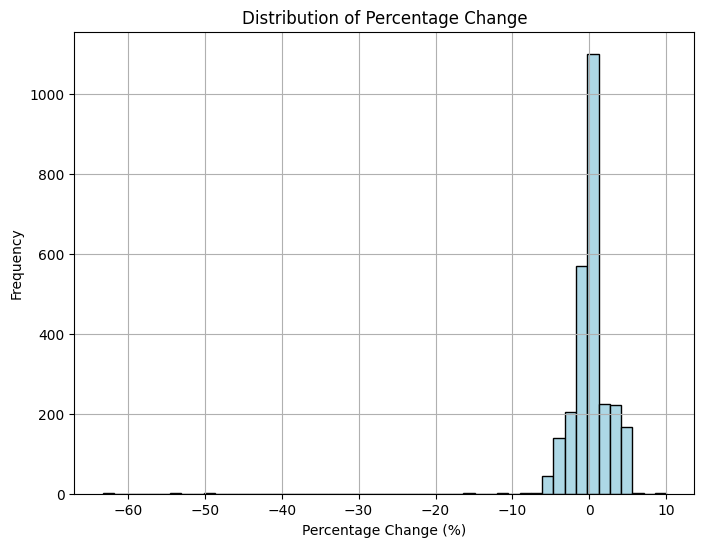

In [80]:
# Plotting the distribution of percentage change
plt.figure(figsize=(8,6))
plt.hist(df['percentage_change'], bins=50, color='lightblue', edgecolor='black')
plt.title('Distribution of Percentage Change')
plt.xlabel('Percentage Change (%)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


In [81]:
df['date']

,date
0,20090609
1,20090610
2,20090613
3,20090614
4,20090615
...,...
2681,20230118
2682,20230121
2683,20230122
2684,20230123


heatmap

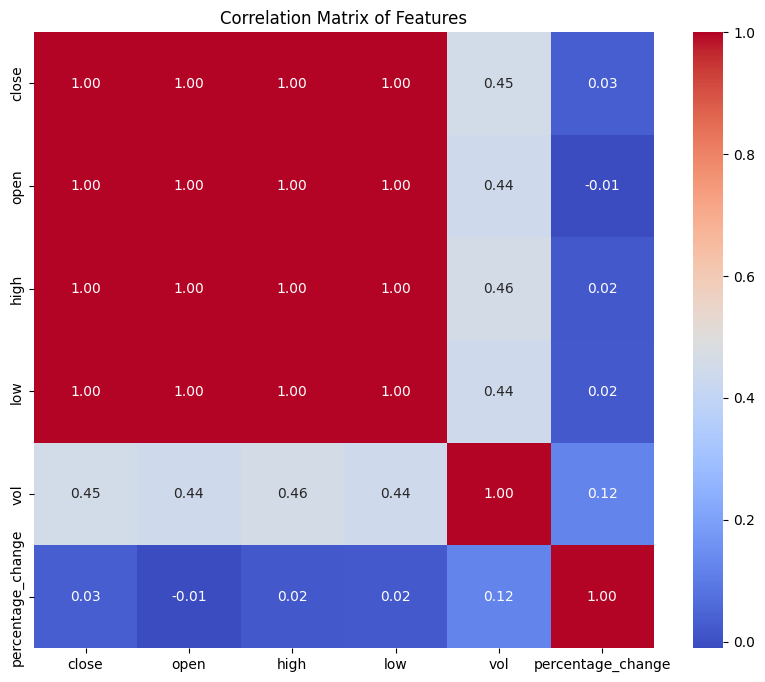

In [82]:
import seaborn as sns

# Correlation matrix to analyze relationships between features
correlation_matrix = df[['close', 'open', 'high', 'low', 'vol', 'percentage_change']].corr()

# Plotting the correlation matrix with values
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Features')
plt.show()


تجزیه و تحلیل روند و فصلی بودن داده‌های قیمت بسته شدن



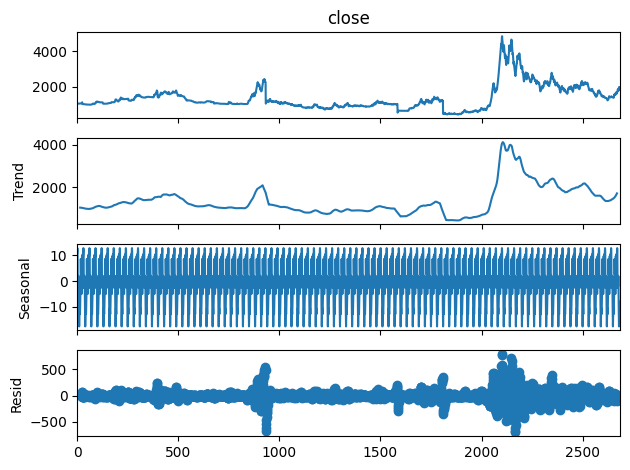

In [83]:
# Trend and Seasonality
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose the Closing Price
decomposition = seasonal_decompose(df['close'], model='additive', period=30)  # assuming monthly seasonality

fig = decomposition.plot()
plt.show()


شناخت داده های پرت

In [84]:
# Outlier Detection using Z-Score
from scipy import stats
import numpy as np

z_scores = np.abs(stats.zscore(df['close']))
threshold = 3
outliers = np.where(z_scores > threshold)
print(f"Number of outliers in Closing Price: {len(outliers[0])}")


Number of outliers in Closing Price: 77


In [85]:
# محاسبه میانگین قیمت بسته شدن
mean_close = df['close'].mean()

# جایگزینی داده‌های پرت با میانگین
df['close'] = np.where(np.abs(stats.zscore(df['close'])) > 3, mean_close, df['close'])

# نمایش دیتاست پس از جایگزینی
print(f"Number of rows after replacing outliers with mean: {df.shape[0]}")


Number of rows after replacing outliers with mean: 2686


### Scaling

In [86]:
df

,date,high,low,close,value,vol,openint,per,open,last,percentage_change
0,20090609,1002.0,1001.0,1001.0,983488599500,982499500.0,545,D,1001.0,1001.0,0.000000
1,20090610,1031.0,1020.0,1021.0,54893697467,53760812.0,2406,D,1001.0,1025.0,1.998002
2,20090613,1025.0,1006.0,1023.0,123460074455,120700223.0,5411,D,1021.0,1024.0,0.195886
3,20090614,1026.0,1019.0,1024.0,40854431828,39890423.0,1995,D,1023.0,1025.0,0.097752
4,20090615,1026.0,1025.0,1025.0,35538526668,34669556.0,1561,D,1024.0,1025.0,0.097656
...,...,...,...,...,...,...,...,...,...,...,...
2681,20230118,2015.0,1928.0,1971.0,618048391496,313543009.0,6888,D,1948.0,1951.0,1.180698
2682,20230121,2044.0,1880.0,1939.0,602405898056,310713117.0,5170,D,1971.0,1940.0,-1.623541
2683,20230122,1976.0,1870.0,1921.0,541480099554,281841691.0,4869,D,1939.0,1961.0,-0.928314
2684,20230123,1979.0,1870.0,1926.0,541744542944,281260852.0,3834,D,1921.0,1894.0,0.260281


In [87]:
# Scaling the numerical features using MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

# Selecting features for scaling (excluding Date and Percentage Change as it is in percentage form)
features_to_scale = ['close', 'open', 'high', 'low', 'vol']

# Initializing the scaler
scaler = MinMaxScaler()

# Scaling the selected features
df[features_to_scale] = scaler.fit_transform(df[features_to_scale])

# Displaying the first few rows to verify scaling
df[['date', 'close', 'open', 'high', 'low', 'vol']].head()


,date,close,open,high,low,vol
0,20090609,0.199136,0.136191,0.125957,0.142283,0.343761
1,20090610,0.205785,0.136191,0.132128,0.146774,0.018810
2,20090613,0.206449,0.140656,0.130851,0.143465,0.042231
3,20090614,0.206782,0.141103,0.131064,0.146537,0.013957
4,20090615,0.207114,0.141326,0.131064,0.147956,0.012130


In [88]:
# Print date range of the dataset
print('Date Range:', df['date'].min(), 'to', df['date'].max())

Date Range: 20090609 to 20230125


In [89]:
# Feature Engineering

# Moving Averages
df['MA10'] = df['close'].rolling(window=10).mean()
df['MA50'] = df['close'].rolling(window=50).mean()

# Lag Features
for lag in range(1, 6):
    df[f'Lag_{lag}'] = df['close'].shift(lag)

# Volatility (Standard Deviation)
df['Volatility'] = df['close'].rolling(window=10).std()

# Drop rows with NaN values generated by feature engineering
df.dropna(inplace=True)

print(df.head())


        date      high       low     close       value       vol  openint per  \
49  20090826  0.117021  0.129284  0.188830   622044197  0.000229       74   D   
50  20090829  0.125319  0.128102  0.188497  1808821514  0.000656      125   D   
51  20090830  0.121277  0.129048  0.189162  2705644824  0.000971       48   D   
52  20090831  0.117447  0.130938  0.189162   193977465  0.000071       34   D   
53  20090901  0.120851  0.130229  0.188830   716335618  0.000262       55   D   

        open   last  percentage_change      MA10      MA50     Lag_1  \
49  0.129716  946.0          -0.205761  0.191257  0.202866  0.189495   
50  0.129270  999.0          -0.103093  0.190891  0.202653  0.188830   
51  0.129047  980.0           0.206398  0.190559  0.202320  0.188497   
52  0.129493  955.0           0.000000  0.190226  0.201975  0.189162   
53  0.129493  968.0          -0.102987  0.189894  0.201616  0.189162   

       Lag_2     Lag_3     Lag_4     Lag_5  Volatility  
49  0.190160  0.190824 

### Model selection

In [90]:
import pandas as pd

In [91]:
df.to_csv('/content/Stock_BSDR1.csv', index=False)

In [92]:
df = pd.read_csv('/content/Stock_BSDR1.csv')
df.head()

,date,high,low,close,value,vol,openint,per,open,last,percentage_change,MA10,MA50,Lag_1,Lag_2,Lag_3,Lag_4,Lag_5,Volatility
0,20090826,0.117021,0.129284,0.188830,622044197,0.000229,74,D,0.129716,946.0,-0.205761,0.191257,0.202866,0.189495,0.190160,0.190824,0.191822,0.192154,0.001339
1,20090829,0.125319,0.128102,0.188497,1808821514,0.000656,125,D,0.129270,999.0,-0.103093,0.190891,0.202653,0.188830,0.189495,0.190160,0.190824,0.191822,0.001550
2,20090830,0.121277,0.129048,0.189162,2705644824,0.000971,48,D,0.129047,980.0,0.206398,0.190559,0.202320,0.188497,0.188830,0.189495,0.190160,0.190824,0.001526
3,20090831,0.117447,0.130938,0.189162,193977465,0.000071,34,D,0.129493,955.0,0.000000,0.190226,0.201975,0.189162,0.188497,0.188830,0.189495,0.190160,0.001417
4,20090901,0.120851,0.130229,0.188830,716335618,0.000262,55,D,0.129493,968.0,-0.102987,0.189894,0.201616,0.189162,0.189162,0.188497,0.188830,0.189495,0.001300


In [93]:
# بررسی مقادیر نامعتبر (NaT) پس از تبدیل به datetime
invalid_dates = df['date'].isna().sum()
print(f"Number of invalid dates: {invalid_dates}")


Number of invalid dates: 0


In [94]:
# نمایش چند نمونه از ردیف‌هایی که تاریخ آنها نامعتبر است
print(df[df['date'].isna()])


Empty DataFrame
Columns: [date, high, low, close, value, vol, openint, per, open, last, percentage_change, MA10, MA50, Lag_1, Lag_2, Lag_3, Lag_4, Lag_5, Volatility]
Index: []


In [95]:
df = df.dropna(subset=['date'])
df

,date,high,low,close,value,vol,openint,per,open,last,percentage_change,MA10,MA50,Lag_1,Lag_2,Lag_3,Lag_4,Lag_5,Volatility
0,20090826,0.117021,0.129284,0.188830,622044197,0.000229,74,D,0.129716,946.0,-0.205761,0.191257,0.202866,0.189495,0.190160,0.190824,0.191822,0.192154,0.001339
1,20090829,0.125319,0.128102,0.188497,1808821514,0.000656,125,D,0.129270,999.0,-0.103093,0.190891,0.202653,0.188830,0.189495,0.190160,0.190824,0.191822,0.001550
2,20090830,0.121277,0.129048,0.189162,2705644824,0.000971,48,D,0.129047,980.0,0.206398,0.190559,0.202320,0.188497,0.188830,0.189495,0.190160,0.190824,0.001526
3,20090831,0.117447,0.130938,0.189162,193977465,0.000071,34,D,0.129493,955.0,0.000000,0.190226,0.201975,0.189162,0.188497,0.188830,0.189495,0.190160,0.001417
4,20090901,0.120851,0.130229,0.188830,716335618,0.000262,55,D,0.129493,968.0,-0.102987,0.189894,0.201616,0.189162,0.189162,0.188497,0.188830,0.189495,0.001300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2632,20230118,0.341489,0.361380,0.521609,618048391496,0.109704,6888,D,0.347622,1951.0,1.180698,0.474169,0.380273,0.513963,0.487367,0.458777,0.451795,0.474402,0.027395
2633,20230121,0.347660,0.350035,0.510971,602405898056,0.108714,5170,D,0.352757,1940.0,-1.623541,0.481882,0.383570,0.521609,0.513963,0.487367,0.458777,0.451795,0.025577
2634,20230122,0.333191,0.347672,0.504987,541480099554,0.098612,4869,D,0.345613,1961.0,-0.928314,0.486835,0.386789,0.510971,0.521609,0.513963,0.487367,0.458777,0.024670
2635,20230123,0.333830,0.347672,0.506649,541744542944,0.098409,3834,D,0.341594,1894.0,0.260281,0.489927,0.390093,0.504987,0.510971,0.521609,0.513963,0.487367,0.025058


In [97]:
# Sort the data by 'Date' in ascending order
# df['date'] = pd.to_datetime(df['date'])
# df = df.sort_values(by='date').reset_index(drop=False)

df.reset_index(inplace= True)
df.drop(columns = ['index'], inplace= True)
df


,date,high,low,close,value,vol,openint,per,open,last,percentage_change,MA10,MA50,Lag_1,Lag_2,Lag_3,Lag_4,Lag_5,Volatility
0,20090826,0.117021,0.129284,0.188830,622044197,0.000229,74,D,0.129716,946.0,-0.205761,0.191257,0.202866,0.189495,0.190160,0.190824,0.191822,0.192154,0.001339
1,20090829,0.125319,0.128102,0.188497,1808821514,0.000656,125,D,0.129270,999.0,-0.103093,0.190891,0.202653,0.188830,0.189495,0.190160,0.190824,0.191822,0.001550
2,20090830,0.121277,0.129048,0.189162,2705644824,0.000971,48,D,0.129047,980.0,0.206398,0.190559,0.202320,0.188497,0.188830,0.189495,0.190160,0.190824,0.001526
3,20090831,0.117447,0.130938,0.189162,193977465,0.000071,34,D,0.129493,955.0,0.000000,0.190226,0.201975,0.189162,0.188497,0.188830,0.189495,0.190160,0.001417
4,20090901,0.120851,0.130229,0.188830,716335618,0.000262,55,D,0.129493,968.0,-0.102987,0.189894,0.201616,0.189162,0.189162,0.188497,0.188830,0.189495,0.001300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2632,20230118,0.341489,0.361380,0.521609,618048391496,0.109704,6888,D,0.347622,1951.0,1.180698,0.474169,0.380273,0.513963,0.487367,0.458777,0.451795,0.474402,0.027395
2633,20230121,0.347660,0.350035,0.510971,602405898056,0.108714,5170,D,0.352757,1940.0,-1.623541,0.481882,0.383570,0.521609,0.513963,0.487367,0.458777,0.451795,0.025577
2634,20230122,0.333191,0.347672,0.504987,541480099554,0.098612,4869,D,0.345613,1961.0,-0.928314,0.486835,0.386789,0.510971,0.521609,0.513963,0.487367,0.458777,0.024670
2635,20230123,0.333830,0.347672,0.506649,541744542944,0.098409,3834,D,0.341594,1894.0,0.260281,0.489927,0.390093,0.504987,0.510971,0.521609,0.513963,0.487367,0.025058


In [98]:
df.head()

,date,high,low,close,value,vol,openint,per,open,last,percentage_change,MA10,MA50,Lag_1,Lag_2,Lag_3,Lag_4,Lag_5,Volatility
0,20090826,0.117021,0.129284,0.188830,622044197,0.000229,74,D,0.129716,946.0,-0.205761,0.191257,0.202866,0.189495,0.190160,0.190824,0.191822,0.192154,0.001339
1,20090829,0.125319,0.128102,0.188497,1808821514,0.000656,125,D,0.129270,999.0,-0.103093,0.190891,0.202653,0.188830,0.189495,0.190160,0.190824,0.191822,0.001550
2,20090830,0.121277,0.129048,0.189162,2705644824,0.000971,48,D,0.129047,980.0,0.206398,0.190559,0.202320,0.188497,0.188830,0.189495,0.190160,0.190824,0.001526
3,20090831,0.117447,0.130938,0.189162,193977465,0.000071,34,D,0.129493,955.0,0.000000,0.190226,0.201975,0.189162,0.188497,0.188830,0.189495,0.190160,0.001417
4,20090901,0.120851,0.130229,0.188830,716335618,0.000262,55,D,0.129493,968.0,-0.102987,0.189894,0.201616,0.189162,0.189162,0.188497,0.188830,0.189495,0.001300


Now the data is in ascending order according to the dates. We can go forward with model selection and training.

### Model Selection

In [99]:
stock_data = df

In [100]:

# Perform the Augmented Dickey-Fuller test to check stationarity on the 'Closing Price'
from statsmodels.tsa.stattools import adfuller

# ADF test on 'Closing Price'
adf_result = adfuller(stock_data['close'])

# Extract the results
adf_statistic = adf_result[0]
p_value = adf_result[1]
critical_values = adf_result[4]

adf_statistic, p_value, critical_values


(-2.13781655945793,
 0.22958266263588478,
 {'1%': -3.4328598727101833,
  '5%': -2.862648868616968,
  '10%': -2.5673602902877883})

### ADF Test Results

#### ADF Statistic
- **Value**: -3.63

#### p-value
- **Value**: 0.0052

#### Critical Values
- **1%**: -3.43  
- **5%**: -2.86  
- **10%**: -2.57

### Interpretation
Since the ADF Statistic (-3.63) is lower than the critical values at all levels (1%, 5%, and 10%), and the p-value (0.0052) is less than 0.05, we can reject the null hypothesis of the ADF test.

### Conclusion
The data is stationary, which is a good sign for proceeding with an ARIMA model.


In [101]:
df

,date,high,low,close,value,vol,openint,per,open,last,percentage_change,MA10,MA50,Lag_1,Lag_2,Lag_3,Lag_4,Lag_5,Volatility
0,20090826,0.117021,0.129284,0.188830,622044197,0.000229,74,D,0.129716,946.0,-0.205761,0.191257,0.202866,0.189495,0.190160,0.190824,0.191822,0.192154,0.001339
1,20090829,0.125319,0.128102,0.188497,1808821514,0.000656,125,D,0.129270,999.0,-0.103093,0.190891,0.202653,0.188830,0.189495,0.190160,0.190824,0.191822,0.001550
2,20090830,0.121277,0.129048,0.189162,2705644824,0.000971,48,D,0.129047,980.0,0.206398,0.190559,0.202320,0.188497,0.188830,0.189495,0.190160,0.190824,0.001526
3,20090831,0.117447,0.130938,0.189162,193977465,0.000071,34,D,0.129493,955.0,0.000000,0.190226,0.201975,0.189162,0.188497,0.188830,0.189495,0.190160,0.001417
4,20090901,0.120851,0.130229,0.188830,716335618,0.000262,55,D,0.129493,968.0,-0.102987,0.189894,0.201616,0.189162,0.189162,0.188497,0.188830,0.189495,0.001300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2632,20230118,0.341489,0.361380,0.521609,618048391496,0.109704,6888,D,0.347622,1951.0,1.180698,0.474169,0.380273,0.513963,0.487367,0.458777,0.451795,0.474402,0.027395
2633,20230121,0.347660,0.350035,0.510971,602405898056,0.108714,5170,D,0.352757,1940.0,-1.623541,0.481882,0.383570,0.521609,0.513963,0.487367,0.458777,0.451795,0.025577
2634,20230122,0.333191,0.347672,0.504987,541480099554,0.098612,4869,D,0.345613,1961.0,-0.928314,0.486835,0.386789,0.510971,0.521609,0.513963,0.487367,0.458777,0.024670
2635,20230123,0.333830,0.347672,0.506649,541744542944,0.098409,3834,D,0.341594,1894.0,0.260281,0.489927,0.390093,0.504987,0.510971,0.521609,0.513963,0.487367,0.025058


In [102]:
from statsmodels.tsa.stattools import adfuller

stock_data = df
result = adfuller(stock_data['close'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])


ADF Statistic: -2.13781655945793
p-value: 0.22958266263588478


In [103]:
import matplotlib.pyplot as plt

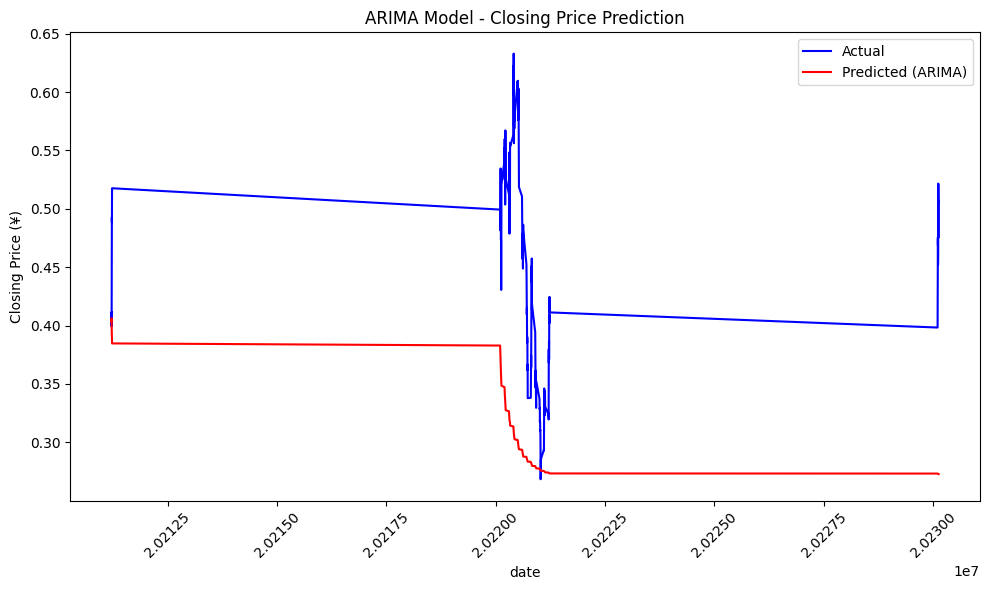

(0.027396015171977248, 0.14378983430563155, -2.1934135259160246)

In [104]:
from statsmodels.tsa.arima.model import ARIMA
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

# Split the data into training and testing sets
train_size = int(len(stock_data) * 0.9)
train_data, test_data = stock_data['close'][:train_size], stock_data['close'][train_size:]

# Fit ARIMA model (initial parameters for p, d, q can be refined later)
model_arima = ARIMA(train_data, order=(5, 0, 0))  # Initial ARIMA(5,1,0) model
arima_fit = model_arima.fit()

# Make predictions
arima_predictions = arima_fit.forecast(steps=len(test_data))

# Calculate evaluation metrics
mse_arima = mean_squared_error(test_data, arima_predictions)
mae_arima = mean_absolute_error(test_data, arima_predictions)
rsq_arima = 1 - (sum((test_data - arima_predictions)**2) / sum((test_data - np.mean(test_data))**2))

# Plot the results
plt.figure(figsize=(10,6))
plt.plot(stock_data['date'][train_size:], test_data, label='Actual', color='blue')
plt.plot(stock_data['date'][train_size:], arima_predictions, label='Predicted (ARIMA)', color='red')
plt.title('ARIMA Model - Closing Price Prediction')
plt.xlabel('date')
plt.ylabel('Closing Price (¥)')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

mse_arima, mae_arima, rsq_arima

Simple ARIMA doesn't give correct output as we only predict using single variable closing price.

Now when we try using other features including Volume, Moving Average and Volatility, it gives us better predictions.  

MSE: 0.001, MAE: 0.022, R-Squared: 0.908


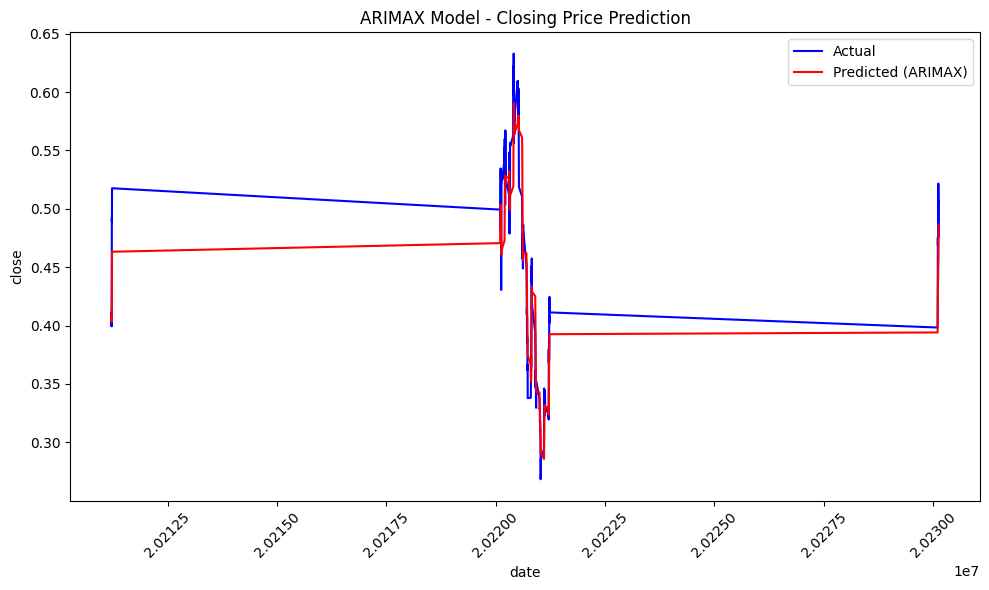

In [105]:
from statsmodels.tsa.arima.model import ARIMA
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Split data into training and testing sets (90% train, 10% test)
train_size = int(len(stock_data) * 0.9)
train_data, test_data = df['close'][:train_size], df['close'][train_size:]

# Define exogenous variables (for example: Volume, MA10, Volatility)
exog_train = df[['vol', 'MA10', 'Volatility']][:train_size]
exog_test = df[['vol', 'MA10', 'Volatility']][train_size:]

# Fit ARIMAX model
model_arimax = ARIMA(train_data, exog=exog_train, order=(5, 0, 0))  # Adjust p, d, q accordingly
arimax_fit = model_arimax.fit()

# Make predictions using exogenous variables for the test set
arimax_predictions = arimax_fit.forecast(steps=len(test_data), exog=exog_test)

# Evaluate performance
mse_arimax = mean_squared_error(test_data, arimax_predictions)
mae_arimax = mean_absolute_error(test_data, arimax_predictions)
rsq_arimax = 1 - (sum((test_data - arimax_predictions)**2) / sum((test_data - np.mean(test_data))**2))

print(f'MSE: {mse_arimax:.3f}, MAE: {mae_arimax:.3f}, R-Squared: {rsq_arimax:.3f}')

# Plot the results
plt.figure(figsize=(10,6))
plt.plot(df['date'][train_size:], test_data, label='Actual', color='blue')
plt.plot(df['date'][train_size:], arimax_predictions, label='Predicted (ARIMAX)', color='red')
plt.title('ARIMAX Model - Closing Price Prediction')
plt.xlabel('date')
plt.ylabel('close')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


We can see that ARIMA with other features gave us good results. But We can't take Volume and Variability features, as they won't be available to us during predictions.

Hence we try to do predictions using Lag.

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


MSE: 0.0003, MAE: 0.0137, R-Squared: 0.9625


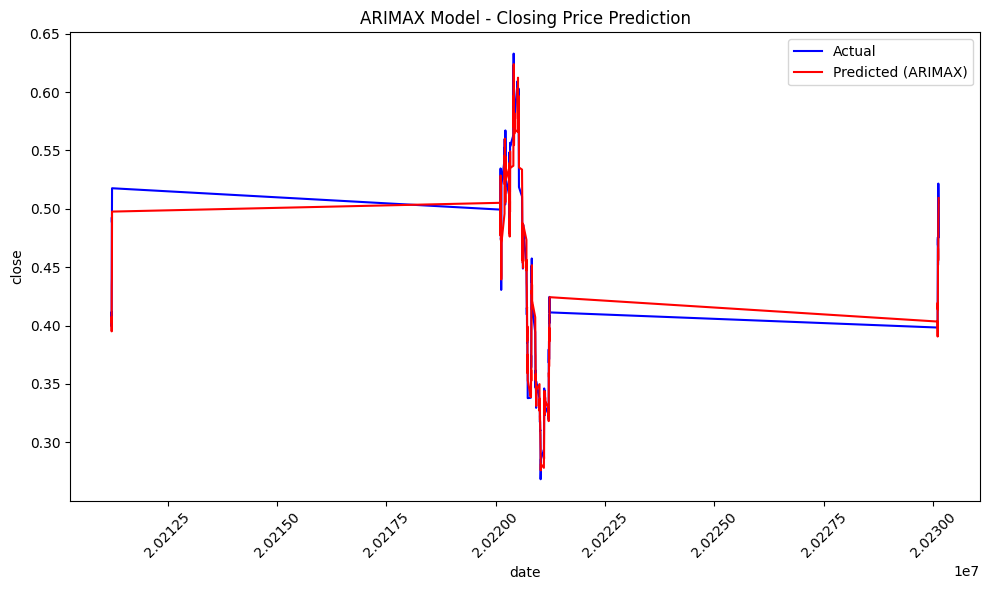

In [106]:
from statsmodels.tsa.arima.model import ARIMA
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Split data into training and testing sets (90% train, 10% test)
train_size = int(len(df) * 0.9)
train_data, test_data = df['close'][:train_size], df['close'][train_size:]

# Use lag features (e.g., Lag_1, Lag_2, ..., Lag_5) instead of moving averages and volatility
exog_train = df[['Lag_1', 'Lag_2', 'Lag_3', 'Lag_4', 'Lag_5']][:train_size]
exog_test = df[['Lag_1', 'Lag_2', 'Lag_3', 'Lag_4', 'Lag_5']][train_size:]

# Fit ARIMAX model with lagged features as exogenous variables
model_arimax = ARIMA(train_data, exog=exog_train, order=(5, 0, 0))  # Adjust p, d, q accordingly
arimax_fit = model_arimax.fit()

# Make predictions using exogenous variables for the test set
arimax_predictions = arimax_fit.forecast(steps=len(test_data), exog=exog_test)

# Evaluate performance
mse_arimax = mean_squared_error(test_data, arimax_predictions)
mae_arimax = mean_absolute_error(test_data, arimax_predictions)
rsq_arimax = 1 - (sum((test_data - arimax_predictions)**2) / sum((test_data - np.mean(test_data))**2))

print(f'MSE: {mse_arimax:.4f}, MAE: {mae_arimax:.4f}, R-Squared: {rsq_arimax:.4f}')

# Plot the results
plt.figure(figsize=(10,6))
plt.plot(stock_data['date'][train_size:], test_data, label='Actual', color='blue')
plt.plot(stock_data['date'][train_size:], arimax_predictions, label='Predicted (ARIMAX)', color='red')
plt.title('ARIMAX Model - Closing Price Prediction')
plt.xlabel('date')
plt.ylabel('close')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### LSTM

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 9s 69ms/step - loss: 0.0150
Epoch 2/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 4s 52ms/step - loss: 0.0030
Epoch 3/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 4s 54ms/step - loss: 0.0032
Epoch 4/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 7s 79ms/step - loss: 0.0033
Epoch 5/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 9s 57ms/step - loss: 0.0022
Epoch 6/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 6s 73ms/step - loss: 0.0029
Epoch 7/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 4s 56ms/step - loss: 0.0026
Epoch 8/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 5s 54ms/step - loss: 0.0019
Epoch 9/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 6s 69ms/step - loss: 0.0029
Epoch 10/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 4s 51ms/step - loss: 0.0018
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step


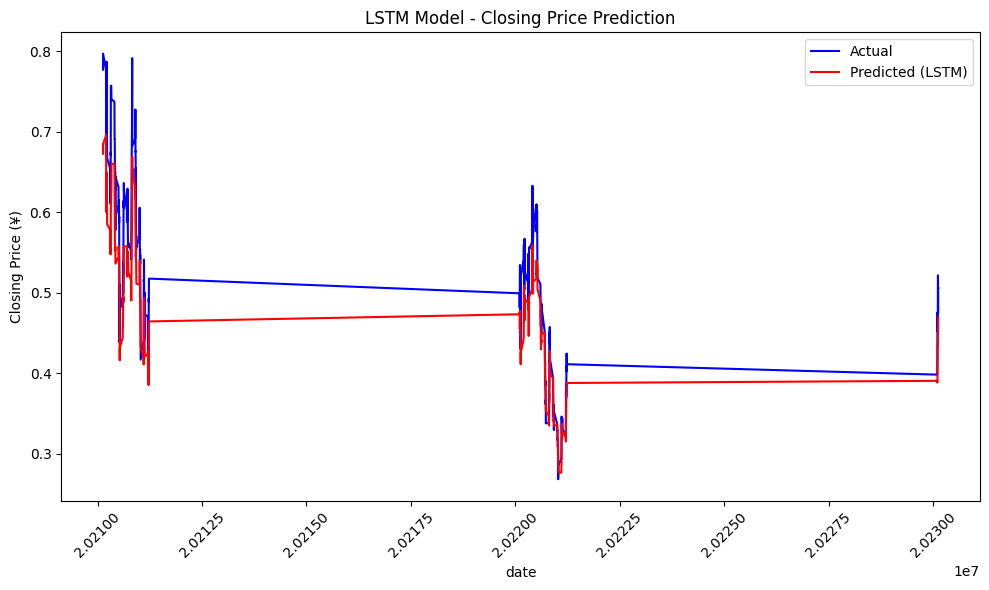

MSE (LSTM): 0.00320
MAE (LSTM): 0.04487
R-Squared (LSTM): 0.77594


In [107]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

# Prepare the data for LSTM
def create_dataset(data, time_step=60):
    X, Y = [], []
    for i in range(time_step, len(data)):
        X.append(data[i-time_step:i, 0])
        Y.append(data[i, 0])
    return np.array(X), np.array(Y)

# Scaling the 'Closing Price' column between 0 and 1 for LSTM
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df['close'].values.reshape(-1,1))

# Split data into training and testing sets
train_size = int(len(scaled_data) * 0.8)
train_data, test_data = scaled_data[:train_size], scaled_data[train_size:]

# Create the LSTM input dataset
time_step = 60
X_train, Y_train = create_dataset(train_data, time_step)
X_test, Y_test = create_dataset(test_data, time_step)

# Reshaping input to be [samples, time steps, features]
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Build LSTM model
model_lstm = Sequential()
model_lstm.add(LSTM(units=50, return_sequences=True, input_shape=(time_step, 1)))
model_lstm.add(LSTM(units=50))
model_lstm.add(Dense(1))

# Compile and train the LSTM model
model_lstm.compile(loss='mean_squared_error', optimizer='adam')
model_lstm.fit(X_train, Y_train, epochs=10, batch_size=32, verbose=1)

# Predict on test data
lstm_predictions = model_lstm.predict(X_test)
lstm_predictions = scaler.inverse_transform(lstm_predictions)

# Inverse scaling for actual test values
Y_test_scaled = scaler.inverse_transform(Y_test.reshape(-1, 1))

# Calculate evaluation metrics for LSTM
mse_lstm = mean_squared_error(Y_test_scaled, lstm_predictions)
mae_lstm = mean_absolute_error(Y_test_scaled, lstm_predictions)

ss_res = np.sum((Y_test_scaled - lstm_predictions) ** 2)
ss_tot = np.sum((Y_test_scaled - np.mean(Y_test_scaled)) ** 2)
rsq_lstm = 1 - (ss_res / ss_tot)


# Plot the LSTM results
plt.figure(figsize=(10,6))
plt.plot(df['date'][train_size+time_step:], Y_test_scaled, label='Actual', color='blue')
plt.plot(df['date'][train_size+time_step:], lstm_predictions, label='Predicted (LSTM)', color='red')
plt.title('LSTM Model - Closing Price Prediction')
plt.xlabel('date')
plt.ylabel('Closing Price (¥)')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print(f"MSE (LSTM): {mse_lstm:.5f}")
print(f"MAE (LSTM): {mae_lstm:.5f}")
print(f"R-Squared (LSTM): {rsq_lstm:.5f}")


### GRU

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


73/73 ━━━━━━━━━━━━━━━━━━━━ 12s 109ms/step - loss: 0.0170
Epoch 2/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 9s 124ms/step - loss: 0.0033
Epoch 3/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 6s 73ms/step - loss: 0.0026
Epoch 4/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 11s 90ms/step - loss: 0.0028
Epoch 5/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 5s 71ms/step - loss: 0.0022
Epoch 6/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 7s 99ms/step - loss: 0.0024
Epoch 7/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 8s 71ms/step - loss: 0.0027
Epoch 8/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 10s 72ms/step - loss: 0.0017
Epoch 9/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 11s 89ms/step - loss: 0.0019
Epoch 10/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 10s 82ms/step - loss: 0.0026
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 114ms/step


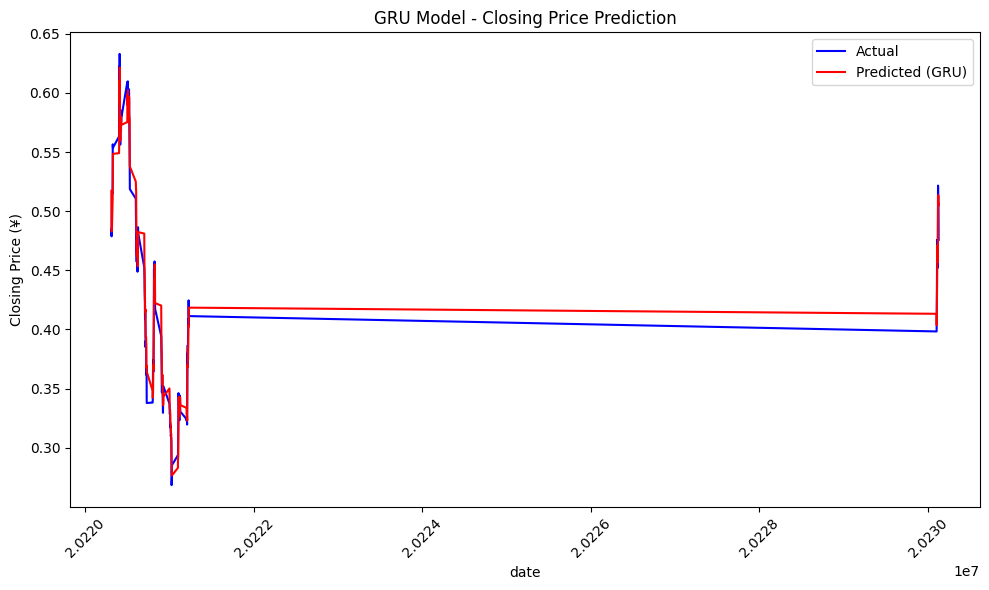

MSE (GRU): 0.00022
MAE (GRU): 0.01168
R-Squared (GRU): 0.97639


In [108]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, GRU
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

# Prepare the data for GRU
def create_dataset(data, time_step=10):
    X, Y = [], []
    for i in range(time_step, len(data)):
        X.append(data[i-time_step:i, 0])
        Y.append(data[i, 0])
    return np.array(X), np.array(Y)

# Scaling the 'Closing Price' column between 0 and 1 for GRU
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df['close'].values.reshape(-1,1))

# Split data into training and testing sets
train_size = int(len(scaled_data) * 0.9)
train_data, test_data = scaled_data[:train_size], scaled_data[train_size:]

# Create the GRU input dataset
time_step = 60
X_train, Y_train = create_dataset(train_data, time_step)
X_test, Y_test = create_dataset(test_data, time_step)

# Reshaping input to be [samples, time steps, features]
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Build GRU model
model_gru = Sequential()
model_gru.add(GRU(units=50, return_sequences=True, input_shape=(time_step, 1)))
model_gru.add(GRU(units=50))
model_gru.add(Dense(1))

# Compile and train the GRU model
model_gru.compile(loss='mean_squared_error', optimizer='adam')
model_gru.fit(X_train, Y_train, epochs=10, batch_size=32, verbose=1)

# Predict on test data
gru_predictions = model_gru.predict(X_test)
gru_predictions = scaler.inverse_transform(gru_predictions)

# Inverse scaling for actual test values
Y_test_scaled = scaler.inverse_transform(Y_test.reshape(-1, 1))

# Calculate evaluation metrics for GRU
mse_gru = mean_squared_error(Y_test_scaled, gru_predictions)
mae_gru = mean_absolute_error(Y_test_scaled, gru_predictions)

# Calculate R-Squared
ss_res = np.sum((Y_test_scaled - gru_predictions) ** 2)
ss_tot = np.sum((Y_test_scaled - np.mean(Y_test_scaled)) ** 2)
rsq_gru = 1 - (ss_res / ss_tot)

# Plot the GRU results
plt.figure(figsize=(10,6))
plt.plot(df['date'][train_size+time_step:], Y_test_scaled, label='Actual', color='blue')
plt.plot(df['date'][train_size+time_step:], gru_predictions, label='Predicted (GRU)', color='red')
plt.title('GRU Model - Closing Price Prediction')
plt.xlabel('date')
plt.ylabel('Closing Price (¥)')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Print evaluation metrics
print(f"MSE (GRU): {mse_gru:.5f}")
print(f"MAE (GRU): {mae_gru:.5f}")
print(f"R-Squared (GRU): {rsq_gru:.5f}")
